In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train[df_train.columns[df_train.isnull().any()]]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [5]:
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_value_df = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values(['percent_missing'], ascending=False)

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
...,...,...
ExterQual,ExterQual,0.000000
Exterior2nd,Exterior2nd,0.000000
Exterior1st,Exterior1st,0.000000
RoofMatl,RoofMatl,0.000000


In [6]:
missing_value = missing_value_df[missing_value_df.percent_missing != 0]
missing_value.sort_values(['percent_missing'], ascending=False)

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
FireplaceQu,FireplaceQu,47.260274
LotFrontage,LotFrontage,17.739726
GarageType,GarageType,5.547945
GarageYrBlt,GarageYrBlt,5.547945
GarageFinish,GarageFinish,5.547945
GarageQual,GarageQual,5.547945


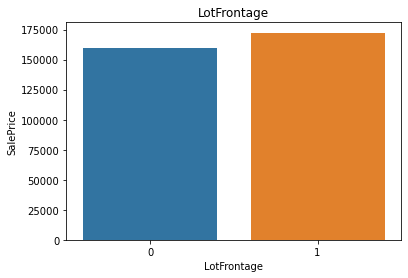

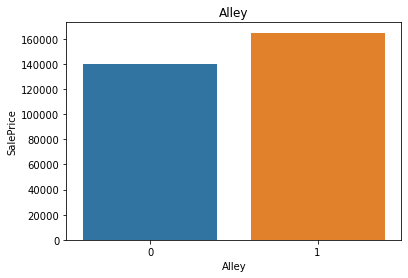

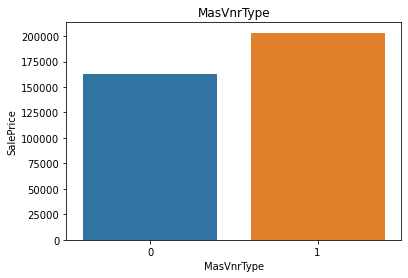

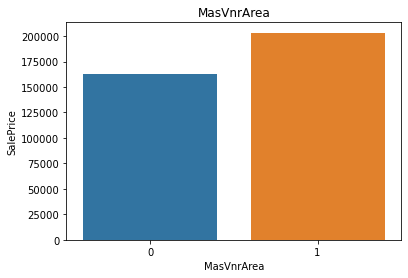

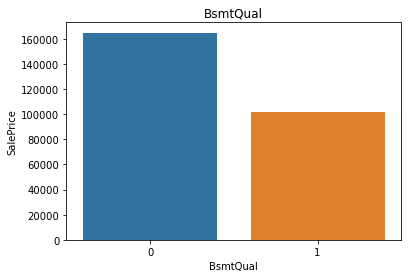

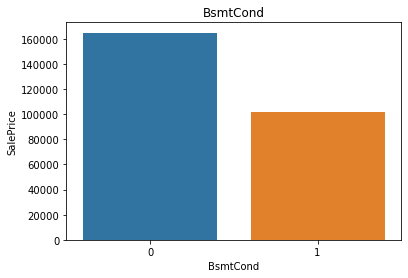

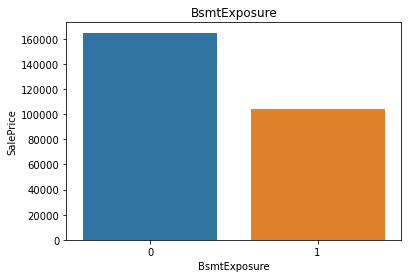

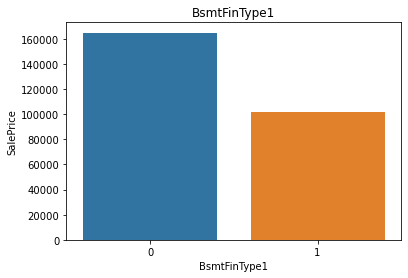

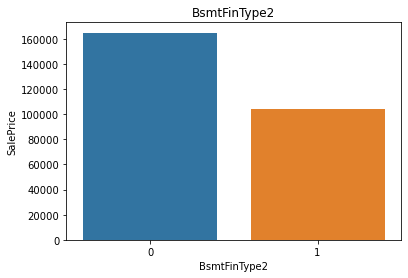

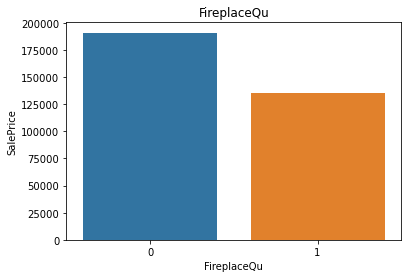

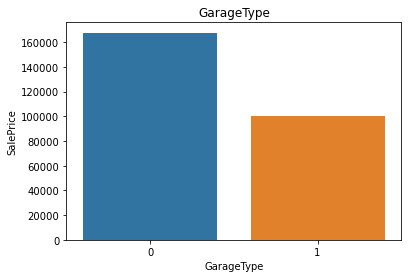

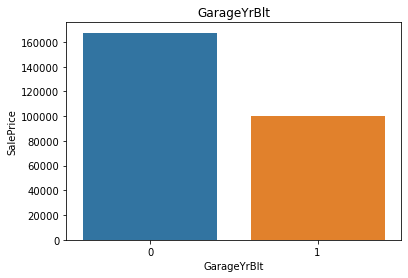

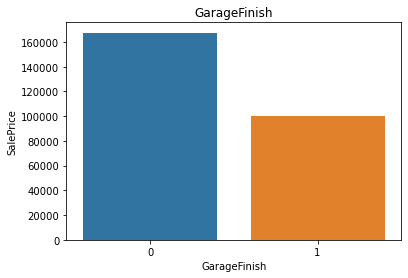

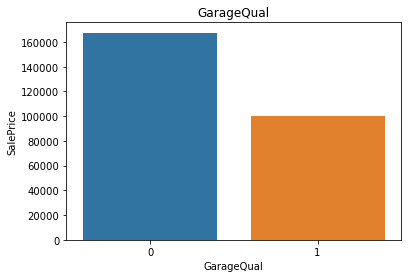

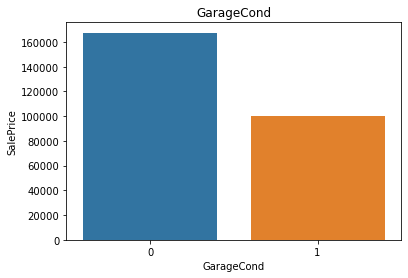

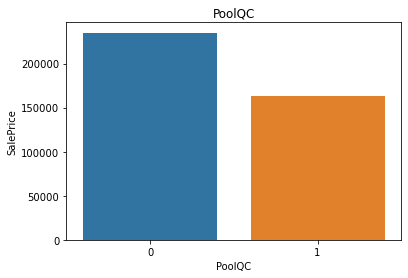

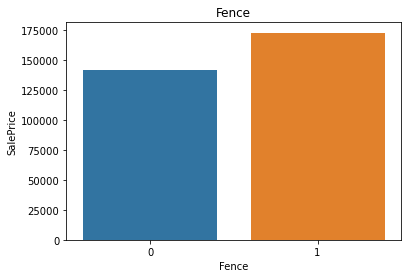

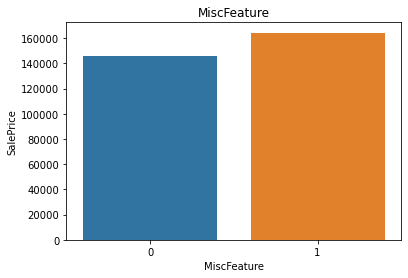

In [7]:
features_with_na=[features for features in df_train.columns if df_train[features].isnull().sum()>1]
for feature in features_with_na:
    data = df_train.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    # let's calculate the mean SalePrice where the information is missing or present
    sns.barplot(x=feature, y='SalePrice', data=data, ci=False, estimator=np.median)
    plt.title(feature)
    plt.show()

In [8]:
categorical_with_nan=[feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtypes=='O']
categorical_with_nan

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

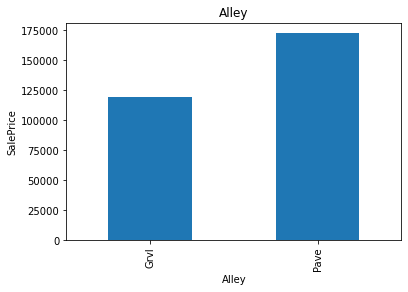

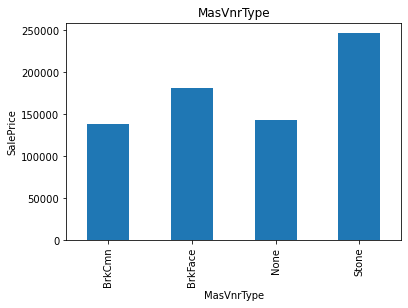

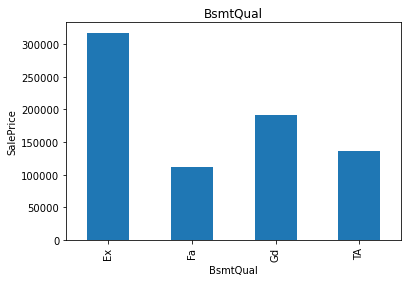

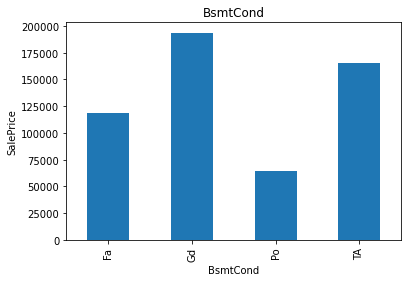

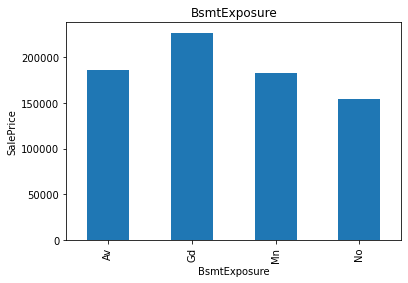

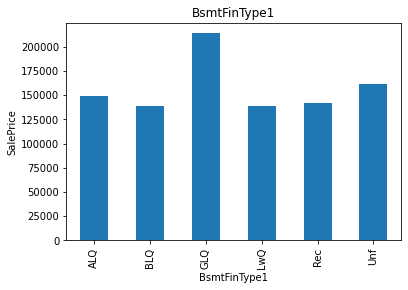

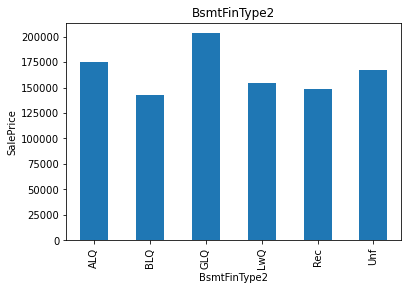

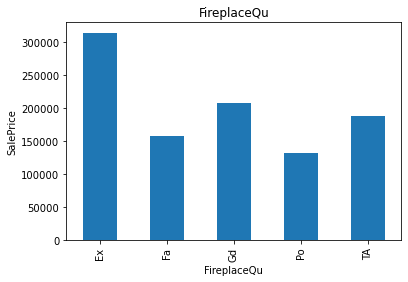

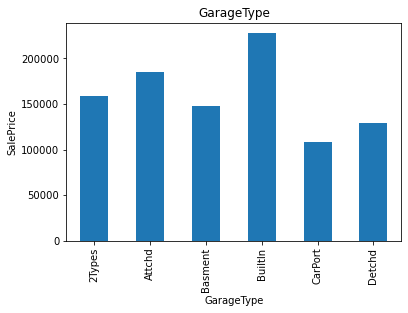

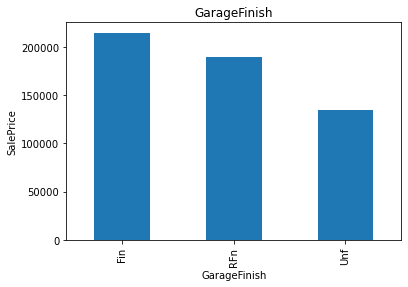

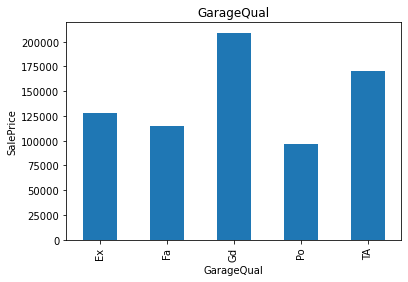

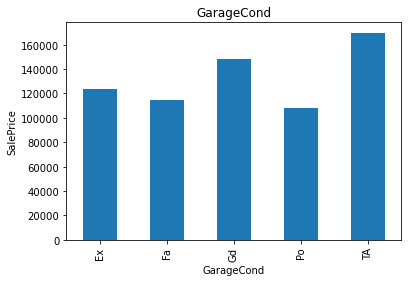

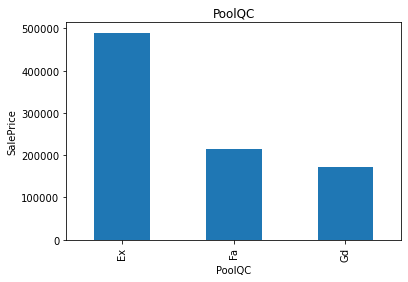

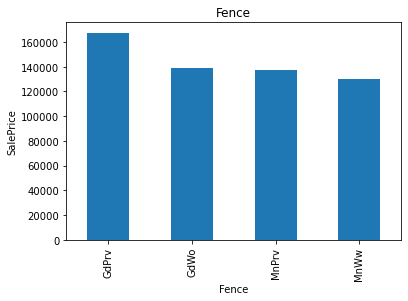

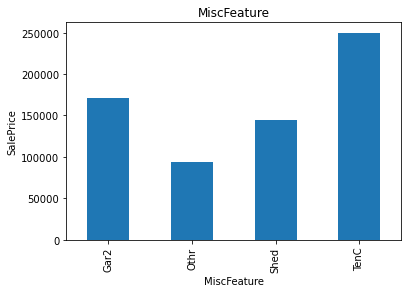

In [9]:
for feature in categorical_with_nan:
    data = df_train.copy()
    data.groupby(feature)['SalePrice'].median().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [10]:
numeric_nan = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtypes!='O']
numeric_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [11]:
for feature in numeric_nan:
    print(df_train[feature].std())

24.284751774483183
181.06620658721818
24.689724768590214


<AxesSubplot:xlabel='MasVnrArea'>

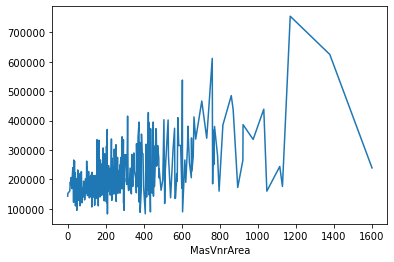

In [12]:
df_train.groupby('MasVnrArea')['SalePrice'].median().plot()

#### 1. Mean/Median/mode Imputation

In [13]:
for feature in numeric_nan:
    ## We will replace by using median since there are outliers
    median_value=df_train[feature].median()
    
    ## create a new feature to capture nan values
    df_train[feature+'nan']=np.where(df_train[feature].isnull(),1,0)
    df_train[feature].fillna(median_value,inplace=True)
df_train[numeric_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [14]:
for feature in numeric_nan:
    print(df_train[feature].std())

22.027677088952412
180.73137335812217
23.99702152893419


### 2. Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? 
It assumes that the data are missing completely at random(MCAR)

In [15]:
df_train = pd.read_csv('train.csv')

In [16]:
numeric_nan = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>1 and df_train[feature].dtypes!='O']
numeric_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [17]:
def impute_nan(df,variable):
    df[variable+"_median"]=df[variable].fillna(df[feature].median())
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [18]:
for feature in numeric_nan:
    impute_nan(df_train,feature)

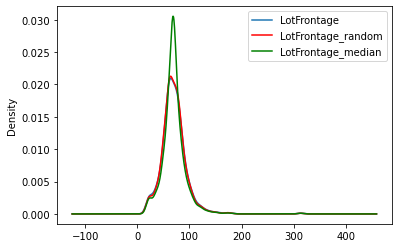

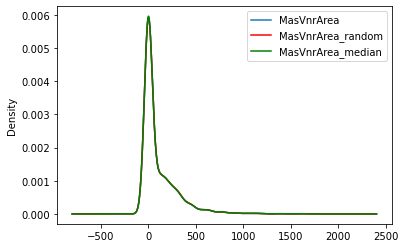

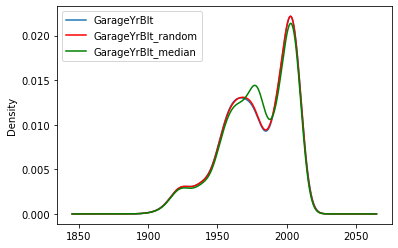

In [19]:
## checking how it affected the distribution before and after imputation
for feature in numeric_nan:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    df_train[feature].plot(kind='kde', ax=ax)
    df_train[feature+"_random"].plot(kind='kde', ax=ax, color='red')
    df_train[feature+"_median"].plot(kind='kde', ax=ax, color='green')
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')

In [20]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_median,LotFrontage_random,MasVnrArea_median,MasVnrArea_random,GarageYrBlt_median,GarageYrBlt_random
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2008,WD,Normal,208500,65.0,65.0,196.0,196.0,2003.0,2003.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,2007,WD,Normal,181500,80.0,80.0,0.0,0.0,1976.0,1976.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,2008,WD,Normal,223500,68.0,68.0,162.0,162.0,2001.0,2001.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2006,WD,Abnorml,140000,60.0,60.0,0.0,0.0,1998.0,1998.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2008,WD,Normal,250000,84.0,84.0,350.0,350.0,2000.0,2000.0


In [21]:
### Keeping only random columns and delete other to reduce dimensity of dataframe.
df_train.drop(['LotFrontage', 'MasVnrArea', 'GarageYrBlt','LotFrontage_median','MasVnrArea_median','GarageYrBlt_median'], axis=1, inplace=True)

In [22]:
df_train

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_random,MasVnrArea_random,GarageYrBlt_random
0,1,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,2,2008,WD,Normal,208500,65.0,196.0,2003.0
1,2,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,0,5,2007,WD,Normal,181500,80.0,0.0,1976.0
2,3,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,0,9,2008,WD,Normal,223500,68.0,162.0,2001.0
3,4,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,0,2,2006,WD,Abnorml,140000,60.0,0.0,1998.0
4,5,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,0,12,2008,WD,Normal,250000,84.0,350.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,8,2007,WD,Normal,175000,62.0,0.0,1999.0
1456,1457,20,RL,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,2,2010,WD,Normal,210000,85.0,119.0,1978.0
1457,1458,70,RL,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Shed,2500,5,2010,WD,Normal,266500,66.0,0.0,1941.0
1458,1459,20,RL,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,4,2010,WD,Normal,142125,68.0,0.0,1950.0


### 3. Capturing NaN values with a New Feature

In [23]:
df = pd.read_csv('train.csv')

In [24]:
numeric_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [25]:
for feature in numeric_nan:
    df[feature+'_NAN']=np.where(df[feature].isnull(),1,0)

In [26]:
df['LotFrontage_NAN'].value_counts()

0    1201
1     259
Name: LotFrontage_NAN, dtype: int64

In [27]:
for feature in numeric_nan:
    df[feature].fillna(df[feature].median(),inplace=True)

In [28]:
df[numeric_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

### Interpolation–Linear

In [29]:
dataset = pd.read_csv('train.csv')

In [30]:
numeric_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [31]:
dataset[numeric_nan].isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [32]:
dataset[feature] = dataset[feature].interpolate(method='linear', limit_direction='forward', axis=0)

In [33]:
dataset[numeric_nan].isnull().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt      0
dtype: int64

## Handling Missing value of categorical feature

In [34]:
##replace nan with missing a new category
def impute_nan(df,variable):
    df[variable]=np.where(df[variable].isnull(),"Missing",df[variable])

In [35]:
for feature in categorical_with_nan:
    impute_nan(df,feature)
    

In [37]:
df[categorical_with_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64